In [ ]:
#Instalando dependências
!pip install numpy
!pip install matplotlib
!pip install seaborn
!pip install hmmlearn
!pip install -U scikit-fuzzy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 1.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 994.0/994.0 kB 6.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894077 sha256=60f9cdfe7d2d06b477136a0d4c07b6d15d002ca37a1fd758091a38b7096515cc
  Stored in directory: /root/.cache/pip/wheels/4f/86/1b/dfd97134a2c8313e519bcebd95d3fedc7be7944db022094bc8
Successfully built scikit-fuzzy


[0.11717046 0.11045701 0.77237253]
Most likely hidden states: [2 2 2 2 2 2]
Log Probability: -15.24163261203189
Most likely hidden states using Viterbi: [2 2 2 2 2 2]


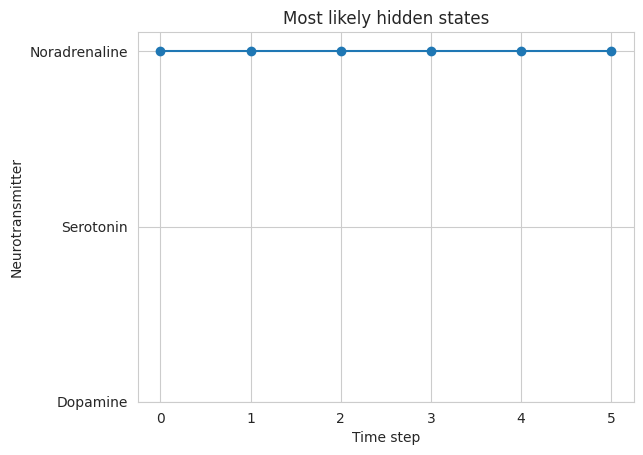

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm
# import ipywidgets as widgets

# def update_slider(slider1, slider2, slider3):
#     total = slider1 + slider2 + slider3
#     if total != 1.0 and total != 0.0:
#         ratio = 1.0 / total
#         slider1 *= ratio
#         slider2 *= ratio
#         slider3 *= ratio
#     return slider1, slider2, slider3

# slider1 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Serotonin Probability:')
# slider2 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Noradrenaline Probability:')
# slider3 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Dopamine Probability:')

# widgets.interact(update_slider, slider1=slider1, slider2=slider2, slider3=slider3)

transition_probability = np.array([[0.6, 0.2, 0.2], [0.3, 0.4, 0.3], [0.1, 0.3, 0.6]])

emission_probability = np.array([[0.05, 0.2, 0.4, 0.05, 0.1, 0.1, 0.05, 0.05],
                                 [0.1, 0.1, 0.3, 0.05, 0.1, 0.1, 0.2, 0.05],
                                 [0.2, 0.05, 0.1, 0.2, 0.05, 0.2, 0.15, 0.05]])

model = hmm.CategoricalHMM(n_components=3, n_iter=100)
# slider1 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Seratonin:')
# slider2 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Noradrenaline:')
# slider3 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Dopamine:')
# ser = slider1.value
# nor = slider2.value
# dop = slider3.value

# model.startprob_ = np.array([ser, nor, dop])
random_values = np.random.rand(3)
normalized_values = random_values / np.sum(random_values)
print(normalized_values)
model.startprob_ = np.array(normalized_values)
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)

hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

log_probability, hidden_states = model.decode(observations_sequence, algorithm='viterbi')
print('Log Probability:', log_probability)
print("Most likely hidden states using Viterbi:", hidden_states)

# Plot the results
state_names = ["Dopamine", "Serotonin", "Noradrenaline"]

sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Neurotransmitter')
plt.title("Most likely hidden states")
plt.yticks(range(len(state_names)), state_names)
plt.show()

[0.26698762 0.46757764 0.26543474]
Most likely hidden states: [2 2 2 2 2 2]
Log Probability: -16.30973060278307
Most likely hidden states using Viterbi: [2 2 2 2 2 2]


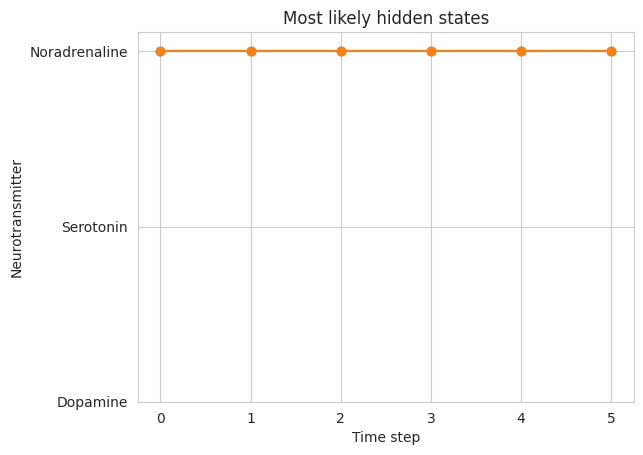

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from hmmlearn import hmm

transition_probability = np.array([[0.6, 0.2, 0.2], [0.3, 0.4, 0.3], [0.1, 0.3, 0.6]])

emission_probability = np.array([[0.05, 0.2, 0.4, 0.05, 0.1, 0.1, 0.05, 0.05],
                                 [0.1, 0.1, 0.3, 0.05, 0.1, 0.1, 0.2, 0.05],
                                 [0.2, 0.05, 0.1, 0.2, 0.05, 0.2, 0.15, 0.05]])

model = hmm.CategoricalHMM(n_components=3, n_iter=100)
random_values = np.random.rand(3)
normalized_values = random_values / np.sum(random_values)
print(normalized_values)
model.startprob_ = np.array(normalized_values)
# model.startprob_ = np.array([0.6, 0.3, 0.1])
model.transmat_ = transition_probability
model.emissionprob_ = emission_probability

observations_sequence = np.array([0, 1, 0, 1, 0, 0]).reshape(-1, 1)

hidden_states = model.predict(observations_sequence)
print("Most likely hidden states:", hidden_states)

log_probability, hidden_states = model.decode(observations_sequence, algorithm='viterbi')
print('Log Probability:', log_probability)
print("Most likely hidden states using Viterbi:", hidden_states)

# Plot the results
sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Most Likely Hidden State')
plt.title("Dopamine or Serotonin or Noradrenaline")

state_names = ["Dopamine", "Serotonin", "Noradrenaline"]

sns.set_style("whitegrid")
plt.plot(hidden_states, '-o', label="Hidden State")
plt.xlabel('Time step')
plt.ylabel('Neurotransmitter')
plt.title("Most likely hidden states")
plt.yticks(range(len(state_names)), state_names)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random
import ipywidgets as widgets
from IPython.display import display

def draw_cube(ser_val, nor_val, dop_val):

  vertices = np.array([
      [1, 1, 1],
      [0, 1, 1],
      [0, 0, 1],
      [1, 0, 1],
      [1, 1, 0],
      [0, 1, 0],
      [0, 0, 0],
      [1, 0, 0]
  ])

  vertices_texts = ['Interest/Excitement', 'Anger/Rage', 'Distress/Anguish', 'Surprise', 'Enjoyment/Joy', 'Fear/Terror',
  'Shame/Humiliation', 'Contempt/Disgust']

  faces = [
      [vertices[0], vertices[1], vertices[2], vertices[3]],
      [vertices[4], vertices[5], vertices[6], vertices[7]],
      [vertices[0], vertices[4], vertices[7], vertices[3]],
      [vertices[1], vertices[5], vertices[6], vertices[2]],
      [vertices[0], vertices[1], vertices[5], vertices[4]],
      [vertices[3], vertices[2], vertices[6], vertices[7]]
  ]

  fig = plt.figure(figsize=(13, 13))
  ax = fig.add_subplot(111, projection='3d')

  ax.add_collection3d(Poly3DCollection(faces, facecolors='lightblue', linewidths=1, edgecolors="black", alpha=0.2))

  for i, v in enumerate(vertices):
      ax.scatter(v[0], v[1], v[2], color='red')
      ax.text(v[0], v[1], v[2], vertices_texts[i], color='black')

  ax.set_xlabel('Serotonin')
  ax.set_ylabel('Dopamine')
  ax.set_zlabel('Noradrenaline')

  ax.scatter(ser_val, dop_val, nor_val, s=100)
  ax.text(ser_val+0.02, dop_val, nor_val, "Current point", color='black')

  plt.show()

slider1 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Seratonin:')
slider2 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Noradrenaline:')
slider3 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Dopamine:')
ser = slider1.value
nor = slider2.value
dop = slider3.value

# Create universe variables
x = np.arange(0, 1, 0.001)
y = np.arange(0, 1, 0.001)
z = np.arange(0, 1, 0.001)
loveheim_range = np.arange(0, 9, 0.01)

# Create the three fuzzy variables - serotonin, noradrenaline, and dopamine
serotonin = ctrl.Antecedent(x, 'serotonin')
noradrenaline = ctrl.Antecedent(y, 'noradrenaline')
dopamine = ctrl.Antecedent(z, 'dopamine')

# Generate fuzzy membership functions
serotonin['low'] = fuzz.trimf(x, [0, 0, 1])
serotonin['high'] = fuzz.trimf(x, [0, 1, 1])

noradrenaline['low'] = fuzz.trimf(y, [0, 0, 1])
noradrenaline['high'] = fuzz.trimf(y, [0, 1, 1])

dopamine['low'] = fuzz.trimf(z, [0, 0, 1])
dopamine['high'] = fuzz.trimf(z, [0, 1, 1])

# serotonin.view()
# noradrenaline.view()
# dopamine.view()

emotion = ctrl.Consequent(loveheim_range, 'emotion')

# Generate fuzzy membership functions for emotion
emotion['shame/humiliation'] = fuzz.trimf(loveheim_range, [0, 0, 4])
emotion['fear/terror'] = fuzz.trimf(loveheim_range, [1, 2, 3])
emotion['distress/anguish'] = fuzz.trimf(loveheim_range, [2, 3, 4])
emotion['contempt/disgust'] = fuzz.trimf(loveheim_range, [3, 4, 5])
emotion['enjoyment/joy'] = fuzz.trimf(loveheim_range, [4, 5, 6])
emotion['anger/rage'] = fuzz.trimf(loveheim_range, [5, 6, 7])
emotion['surprise'] = fuzz.trimf(loveheim_range, [6, 7, 8])
emotion['interest/excitement'] = fuzz.trimf(loveheim_range, [5, 9, 9])

rule1 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['high'], emotion['interest/excitement'])
rule2 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['high'], emotion['anger/rage'])
rule3 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['low'], emotion['distress/anguish'])
rule4 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['low'], emotion['surprise'])
rule5 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['high'], emotion['enjoyment/joy'])
rule6 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['high'], emotion['fear/terror'])
rule7 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['low'], emotion['shame/humiliation'])
rule8 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['low'], emotion['contempt/disgust'])

emotion_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8])

emotion_simulation = ctrl.ControlSystemSimulation(emotion_ctrl)

def calculate_output(ser_val, nor_val, dop_val):
  # Set input values (neurotransmitter levels)
  emotion_simulation.input['serotonin'] = ser_val
  emotion_simulation.input['noradrenaline'] = nor_val
  emotion_simulation.input['dopamine'] = dop_val

  # Compute the output (predicted emotion)
  emotion_simulation.compute()

  # Print the predicted emotion
  print("Predicted Emotion:", emotion_simulation.output['emotion'])
  mem1 = fuzz.interp_membership(loveheim_range, emotion['interest/excitement'].mf, emotion_simulation.output['emotion'])
  mem2 = fuzz.interp_membership(loveheim_range, emotion['anger/rage'].mf, emotion_simulation.output['emotion'])
  mem3 = fuzz.interp_membership(loveheim_range, emotion['distress/anguish'].mf, emotion_simulation.output['emotion'])
  mem4 = fuzz.interp_membership(loveheim_range, emotion['surprise'].mf, emotion_simulation.output['emotion'])
  mem5 = fuzz.interp_membership(loveheim_range, emotion['enjoyment/joy'].mf, emotion_simulation.output['emotion'])
  mem6 = fuzz.interp_membership(loveheim_range, emotion['fear/terror'].mf, emotion_simulation.output['emotion'])
  mem7 = fuzz.interp_membership(loveheim_range, emotion['shame/humiliation'].mf, emotion_simulation.output['emotion'])
  mem8 = fuzz.interp_membership(loveheim_range, emotion['contempt/disgust'].mf, emotion_simulation.output['emotion'])
  print(f"{emotion['interest/excitement']}: {mem1*100:.2f}%")
  print(f"{emotion['anger/rage']}: {mem2*100:.2f}%")
  print(f"{emotion['distress/anguish']}: {mem3*100:.2f}%")
  print(f"{emotion['surprise']}: {mem4*100:.2f}%")
  print(f"{emotion['enjoyment/joy']}: {mem5*100:.2f}%")
  print(f"{emotion['fear/terror']}: {mem6*100:.2f}%")
  print(f"{emotion['shame/humiliation']}: {mem7*100:.2f}%")
  print(f"{emotion['contempt/disgust']}: {mem8*100:.2f}%")
  emotion.view(sim=emotion_simulation)
  plt.show()

  # emotion.view()

def insert_neuro_values(ser_val, nor_val, dop_val):
  draw_cube(ser_val, nor_val, dop_val)
  print("Seratonin:", ser_val, "\nNoradrenaline:", nor_val, "\nDopamine:", dop_val)
  calculate_output(ser_val, nor_val, dop_val)

widgets.interact(insert_neuro_values, ser_val=slider1, nor_val=slider2, dop_val=slider3)

interactive(children=(FloatSlider(value=0.0, description='Seratonin:', max=1.0, step=0.01), FloatSlider(value=…

<function __main__.insert_neuro_values(ser_val, nor_val, dop_val)>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random
import ipywidgets as widgets
from IPython.display import display

def draw_cube(ser_val, nor_val, dop_val):

  vertices = np.array([
      [1, 1, 1],
      [0, 1, 1],
      [0, 0, 1],
      [1, 0, 1],
      [1, 1, 0],
      [0, 1, 0],
      [0, 0, 0],
      [1, 0, 0]
  ])

  vertices_texts = ['Interest/Excitement', 'Anger/Rage', 'Distress/Anguish', 'Surprise', 'Enjoyment/Joy', 'Fear/Terror',
  'Shame/Humiliation', 'Contempt/Disgust']

  faces = [
      [vertices[0], vertices[1], vertices[2], vertices[3]],
      [vertices[4], vertices[5], vertices[6], vertices[7]],
      [vertices[0], vertices[4], vertices[7], vertices[3]],
      [vertices[1], vertices[5], vertices[6], vertices[2]],
      [vertices[0], vertices[1], vertices[5], vertices[4]],
      [vertices[3], vertices[2], vertices[6], vertices[7]]
  ]

  fig = plt.figure(figsize=(13, 13))
  ax = fig.add_subplot(111, projection='3d')

  ax.add_collection3d(Poly3DCollection(faces, facecolors='lightblue', linewidths=1, edgecolors="black", alpha=0.2))

  for i, v in enumerate(vertices):
      ax.scatter(v[0], v[1], v[2], color='red')
      ax.text(v[0], v[1], v[2], vertices_texts[i], color='black')

  ax.set_xlabel('Serotonin')
  ax.set_ylabel('Dopamine')
  ax.set_zlabel('Noradrenaline')

  ax.scatter(ser_val, dop_val, nor_val, s=100)
  ax.text(ser_val+0.02, dop_val, nor_val, "Current point", color='black')

  plt.show()

slider1 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Seratonin:')
slider2 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Noradrenaline:')
slider3 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Dopamine:')
ser = slider1.value
nor = slider2.value
dop = slider3.value

def point_distance(ser, nor, dop, x, y, z):
  return np.sqrt((ser-x)**2 + (nor-y)**2 + (dop-z)**2)

def distance_score(ser, nor, dop, x, y, z):
    return (1 - point_distance(ser, nor, dop, x, y, z) / np.sqrt(3)) * 100

def untie_emotions(score, emotions):
    # find which ones have the highest score
    max_score = max(score)
    max_emotions = []
    for i in range(len(score)):
        if score[i] == max_score:
            max_emotions.append(emotions[i])

    # if there are multiple emotions with the same score, choose one randomly
    print(f"Result emotion is {random.choice(max_emotions)}.")

def get_best_score(ser, nor, dop):
    emotions = ['Interest/Excitement', 'Anger/Rage', 'Fear/Terror', 'Surprise', 'Enjoyment/Joy', 'Distress/Anguish', 'Shame/Humiliation', 'Contempt/Disgust']
    # calculate the scores of the 8 vertices
    score = []
    score.append(distance_score(ser, nor, dop, 1, 1, 1))
    score.append(distance_score(ser, nor, dop, 0, 1, 1))
    score.append(distance_score(ser, nor, dop, 0, 0, 1))
    score.append(distance_score(ser, nor, dop, 1, 1, 0))
    score.append(distance_score(ser, nor, dop, 1, 0, 1))
    score.append(distance_score(ser, nor, dop, 0, 1, 0))
    score.append(distance_score(ser, nor, dop, 0, 0, 0))
    score.append(distance_score(ser, nor, dop, 1, 0, 0))

    max_score = max(score)
    total_score = sum(score)

    # check if there are multiple vertices with the same max score
    if score.count(max_score) > 1:
        normalization_factor = 100 / total_score
        for i in range(len(score)):
            score[i] *= normalization_factor
    else:
        normalization_factor = (100 - max_score) / (total_score - max_score)
        for i in range(len(score)):
            if score[i] != max_score:
                score[i] *= normalization_factor

    # print the scores of the 8 vertices
    print("Interest/Excitement: ", score[0])
    print("Anger/Rage: ", score[1])
    print("Fear/Terror: ", score[2])
    print("Surprise: ", score[3])
    print("Enjoyment/Joy: ", score[4])
    print("Distress/Anguish: ", score[5])
    print("Shame/Humiliation: ", score[6])
    print("Contempt/Disgust: ", score[7])
    print(sum(score))
    if score.count(max(score)) > 1:
      untie_emotions(score, emotions)
    else:
        print(f"{emotions[score.index(max(score))]}")

def insert_neuro_values(ser_val, nor_val, dop_val):
  draw_cube(ser_val, nor_val, dop_val)
  print("Seratonin:", ser_val, "\nNoradrenaline:", nor_val, "\nDopamine:", dop_val)
  get_best_score(ser_val, nor_val, dop_val)

widgets.interact(insert_neuro_values, ser_val=slider1, nor_val=slider2, dop_val=slider3)

interactive(children=(FloatSlider(value=0.0, description='Seratonin:', max=1.0, step=0.01), FloatSlider(value=…

<function __main__.insert_neuro_values(ser_val, nor_val, dop_val)>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import random
import ipywidgets as widgets
from IPython.display import display

def draw_cube(ser_val, nor_val, dop_val):

  vertices = np.array([
      [1, 1, 1],
      [0, 1, 1],
      [0, 0, 1],
      [1, 0, 1],
      [1, 1, 0],
      [0, 1, 0],
      [0, 0, 0],
      [1, 0, 0]
  ])

  midpoints = np.array([
      [(vertices[0][0] + vertices[1][0]) / 2, (vertices[0][1] + vertices[1][1]) / 2, (vertices[0][2] + vertices[1][2]) / 2],
      [(vertices[1][0] + vertices[2][0]) / 2, (vertices[1][1] + vertices[2][1]) / 2, (vertices[1][2] + vertices[2][2]) / 2],
      [(vertices[2][0] + vertices[3][0]) / 2, (vertices[2][1] + vertices[3][1]) / 2, (vertices[2][2] + vertices[3][2]) / 2],
      [(vertices[3][0] + vertices[0][0]) / 2, (vertices[3][1] + vertices[0][1]) / 2, (vertices[3][2] + vertices[0][2]) / 2],
      [(vertices[4][0] + vertices[5][0]) / 2, (vertices[4][1] + vertices[5][1]) / 2, (vertices[4][2] + vertices[5][2]) / 2],
      [(vertices[5][0] + vertices[6][0]) / 2, (vertices[5][1] + vertices[6][1]) / 2, (vertices[5][2] + vertices[6][2]) / 2],
      [(vertices[6][0] + vertices[7][0]) / 2, (vertices[6][1] + vertices[7][1]) / 2, (vertices[6][2] + vertices[7][2]) / 2],
      [(vertices[7][0] + vertices[4][0]) / 2, (vertices[7][1] + vertices[4][1]) / 2, (vertices[7][2] + vertices[4][2]) / 2],
      [(vertices[0][0] + vertices[4][0]) / 2, (vertices[0][1] + vertices[4][1]) / 2, (vertices[0][2] + vertices[4][2]) / 2],
      [(vertices[1][0] + vertices[5][0]) / 2, (vertices[1][1] + vertices[5][1]) / 2, (vertices[1][2] + vertices[5][2]) / 2],
      [(vertices[2][0] + vertices[6][0]) / 2, (vertices[2][1] + vertices[6][1]) / 2, (vertices[2][2] + vertices[6][2]) / 2],
      [(vertices[3][0] + vertices[7][0]) / 2, (vertices[3][1] + vertices[7][1]) / 2, (vertices[3][2] + vertices[7][2]) / 2]
  ])

  vertices_texts = ['Vigilance', 'Rage/Interest', 'Distraction/Annoyance/Grief', 'Amazement/Interest', 'Ecstasy/Interest', 'Serenity/Annoyance/Terror',
  'Apprehension/Boredom/Pensiveness', 'Loathing/Serenity/Distraction', 'Anticipation', 'Anger', 'Surprise', 'Anticipation', 'Joy',
  'Fear', 'Disgust', 'Joy', 'Anticipation', 'Anger', 'Sadness', 'Surprise']

  vertices = np.concatenate((vertices, midpoints))

  faces = [
      [vertices[0], vertices[1], vertices[2], vertices[3]],
      [vertices[4], vertices[5], vertices[6], vertices[7]],
      [vertices[0], vertices[4], vertices[7], vertices[3]],
      [vertices[1], vertices[5], vertices[6], vertices[2]],
      [vertices[0], vertices[1], vertices[5], vertices[4]],
      [vertices[3], vertices[2], vertices[6], vertices[7]]
  ]

  fig = plt.figure(figsize=(13, 13))
  ax = fig.add_subplot(111, projection='3d')

  ax.add_collection3d(Poly3DCollection(faces, facecolors='lightblue', linewidths=1, edgecolors="black", alpha=0.2))

  for i, v in enumerate(vertices):
      ax.scatter(v[0], v[1], v[2], color='red')
      ax.text(v[0], v[1], v[2], vertices_texts[i], color='black')

  # adding neutral vertices
  ax.scatter(0.5, 0.5, 0.5, color='red')
  ax.text(0.5, 0.5, 0.5, "Neutral", color='black')
  ax.scatter(0.5, 0.5, 0, color='red')
  ax.text(0.5, 0.5, 0, "Neutral", color='black')
  ax.scatter(0.5, 0, 0.5, color='red')
  ax.text(0.5, 0, 0.5, "Neutral", color='black')
  ax.scatter(0, 0.5, 0.5, color='red')
  ax.text(0, 0.5, 0.5, "Neutral", color='black')
  ax.scatter(0.5, 0.5, 1, color='red')
  ax.text(0.5, 0.5, 1, "Neutral", color='black')
  ax.scatter(0.5, 1, 0.5, color='red')
  ax.text(0.5, 1, 0.5, "Neutral", color='black')
  ax.scatter(1, 0.5, 0.5, color='red')
  ax.text(1, 0.5, 0.5, "Neutral", color='black')

  ax.set_xlabel('Serotonin')
  ax.set_ylabel('Dopamine')
  ax.set_zlabel('Noradrenaline')

  ax.scatter(ser_val, dop_val, nor_val, s=100)
  ax.text(ser_val+0.02, dop_val, nor_val, "Current point", color='black')

  plt.show()

slider1 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Seratonin:')
slider2 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Noradrenaline:')
slider3 = widgets.FloatSlider(min=0, max=1, step=0.01, description='Dopamine:')
ser = slider1.value
nor = slider2.value
dop = slider3.value

# Create universe variables
x = np.arange(0, 1, 0.001)
y = np.arange(0, 1, 0.001)
z = np.arange(0, 1, 0.001)
plutchik_range = np.arange(-1, 1, 0.001)

# Create the three fuzzy variables - serotonin, noradrenaline, and dopamine
serotonin = ctrl.Antecedent(x, 'serotonin')
noradrenaline = ctrl.Antecedent(y, 'noradrenaline')
dopamine = ctrl.Antecedent(z, 'dopamine')
joy_axis = ctrl.Consequent(plutchik_range, 'joy_axis')
disgust_axis = ctrl.Consequent(plutchik_range, 'disgust_axis')
fear_axis = ctrl.Consequent(plutchik_range, 'fear_axis')
surprise_axis = ctrl.Consequent(plutchik_range, 'surprise_axis')

# Generate fuzzy membership functions
serotonin['low'] = fuzz.trimf(x, [0, 0, 0.5])
serotonin['medium'] = fuzz.trimf(x, [0, 0.5, 1])
serotonin['high'] = fuzz.trimf(x, [0.5, 1, 1])

noradrenaline['low'] = fuzz.trimf(y, [0, 0, 0.5])
noradrenaline['medium'] = fuzz.trimf(y, [0, 0.5, 1])
noradrenaline['high'] = fuzz.trimf(y, [0.5, 1, 1])

dopamine['low'] = fuzz.trimf(z, [0, 0, 0.5])
dopamine['medium'] = fuzz.trimf(z, [0, 0.5, 1])
dopamine['high'] = fuzz.trimf(z, [0.5, 1, 1])

# serotonin['low'] = fuzz.gaussmf(x, 0, 0.3)
# serotonin['medium'] = fuzz.gaussmf(x, 0.7, 0.3)
# serotonin['high'] = fuzz.gaussmf(x, 1, 0.7)

# noradrenaline['low'] = fuzz.gaussmf(y, 0, 0.3)
# noradrenaline['medium'] = fuzz.gaussmf(y, 0.3, 0.7)
# noradrenaline['high'] = fuzz.gaussmf(y, 0.7, 1)

# dopamine['low'] = fuzz.gaussmf(z, 0, 0.3)
# dopamine['medium'] = fuzz.gaussmf(z, 0.3, 0.7)
# dopamine['high'] = fuzz.gaussmf(z, 0.7, 1)

# serotonin.view()
# noradrenaline.view()
# dopamine.view()

def emotions_range(axis, emotions, range="all"):
  if range == "all":
    axis[emotions[0]] = fuzz.trimf(plutchik_range, [-1, -1, -0.55])
    axis[emotions[1]] = fuzz.trimf(plutchik_range, [-1, -0.55, -0.1])
    axis[emotions[2]] = fuzz.trimf(plutchik_range, [-0.55, -0.1, -0.1])
    axis[emotions[3]] = fuzz.trimf(plutchik_range, [0.1, 0.1, 0.55])
    axis[emotions[4]] = fuzz.trimf(plutchik_range, [0.1, 0.55, 1])
    axis[emotions[5]] = fuzz.trimf(plutchik_range, [0.55, 1, 1])
    axis[emotions[6]] = fuzz.trimf(plutchik_range, [0, 0, 0])
  elif range == "positive":
    axis[emotions[0]] = fuzz.trimf(plutchik_range, [0.1, 0.1, 0.55])
    axis[emotions[1]] = fuzz.trimf(plutchik_range, [0.1, 0.55, 1])
    axis[emotions[2]] = fuzz.trimf(plutchik_range, [0.55, 1, 1])
    axis[emotions[3]] = fuzz.trimf(plutchik_range, [0, 0, 0])
  elif range == "negative":
    axis[emotions[0]] = fuzz.trimf(plutchik_range, [-1, -1, -0.55])
    axis[emotions[1]] = fuzz.trimf(plutchik_range, [-1, -0.55, -0.1])
    axis[emotions[2]] = fuzz.trimf(plutchik_range, [-0.55, -0.1, -0.1])
    axis[emotions[3]] = fuzz.trimf(plutchik_range, [0, 0, 0])
  return axis

joy_axis = emotions_range(joy_axis, ['pensiveness', 'sadness', 'grief', 'serenity', 'joy', 'ecstasy', 'neutral'])
disgust_axis = emotions_range(disgust_axis, ['boredom', 'disgust', 'loathing', 'neutral'], "negative")
fear_axis = emotions_range(fear_axis, ['annoyance', 'anger', 'rage', 'apprehension', 'fear', 'terror', 'neutral'])
surprise_axis = emotions_range(surprise_axis, ['interest', 'anticipation', 'vigilance', 'distraction', 'surprise', 'amazement', 'neutral'])

# 27 rules for each axis

joy_axis_rule1 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['low'], joy_axis['pensiveness'])
joy_axis_rule2 = ctrl.Rule(serotonin['low'] & noradrenaline['medium'] & dopamine['low'], joy_axis['sadness'])
joy_axis_rule3 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['low'], joy_axis['grief'])
joy_axis_rule4 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['low'], joy_axis['serenity'])
joy_axis_rule5 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['high'], joy_axis['serenity'])
joy_axis_rule6 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['medium'], joy_axis['joy'])
joy_axis_rule7 = ctrl.Rule(serotonin['medium'] & noradrenaline['low'] & dopamine['high'], joy_axis['joy'])
joy_axis_rule8 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['high'], joy_axis['ecstasy'])
joy_axis_rule9 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['high'], joy_axis['neutral'])
joy_axis_rule10 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['low'], joy_axis['neutral'])
joy_axis_rule11 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['medium'], joy_axis['neutral'])
joy_axis_rule12 = ctrl.Rule(serotonin['high'] & noradrenaline['medium'] & dopamine['high'], joy_axis['neutral'])
joy_axis_rule13 = ctrl.Rule(serotonin['medium'] & noradrenaline['high'] & dopamine['high'], joy_axis['neutral'])
joy_axis_rule14 = ctrl.Rule(serotonin['medium'] & noradrenaline['medium'] & dopamine['medium'], joy_axis['neutral'])
joy_axis_rule15 = ctrl.Rule(serotonin['medium'] & noradrenaline['medium'] & dopamine['high'], joy_axis['neutral'])
joy_axis_rule16 = ctrl.Rule(serotonin['medium'] & noradrenaline['high'] & dopamine['medium'], joy_axis['neutral'])
joy_axis_rule17 = ctrl.Rule(serotonin['high'] & noradrenaline['medium'] & dopamine['medium'], joy_axis['neutral'])
joy_axis_rule18 = ctrl.Rule(serotonin['medium'] & noradrenaline['medium'] & dopamine['low'], joy_axis['neutral'])
joy_axis_rule19 = ctrl.Rule(serotonin['medium'] & noradrenaline['low'] & dopamine['medium'], joy_axis['neutral'])
joy_axis_rule20 = ctrl.Rule(serotonin['low'] & noradrenaline['medium'] & dopamine['medium'], joy_axis['neutral'])
joy_axis_rule21 = ctrl.Rule(serotonin['medium'] & noradrenaline['low'] & dopamine['low'], joy_axis['neutral'])
joy_axis_rule22 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['medium'], joy_axis['neutral'])
joy_axis_rule23 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['high'], joy_axis['neutral'])
joy_axis_rule24 = ctrl.Rule(serotonin['low'] & noradrenaline['medium'] & dopamine['high'], joy_axis['neutral'])
joy_axis_rule25 = ctrl.Rule(serotonin['medium'] & noradrenaline['high'] & dopamine['low'], joy_axis['neutral'])
joy_axis_rule26 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['medium'], joy_axis['neutral'])
joy_axis_rule27 = ctrl.Rule(serotonin['high'] & noradrenaline['medium'] & dopamine['low'], joy_axis['neutral'])

disgust_axis_rule1 = ctrl.Rule(serotonin['medium'] & noradrenaline['low'] & dopamine['low'], disgust_axis['disgust'])
disgust_axis_rule2 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['low'], disgust_axis['boredom'])
disgust_axis_rule3 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['low'], disgust_axis['loathing'])
disgust_axis_rule4 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['high'], disgust_axis['neutral'])

fear_axis_rule1 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['medium'], fear_axis['fear'])
fear_axis_rule2 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['medium'], fear_axis['anger'])
fear_axis_rule3 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['low'], fear_axis['apprehension'])
fear_axis_rule4 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['high'], fear_axis['terror'])
fear_axis_rule5 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['low'], fear_axis['annoyance'])
fear_axis_rule6 = ctrl.Rule(serotonin['low'] & noradrenaline['medium'] & dopamine['high'], fear_axis['anger'])
fear_axis_rule7 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['high'], fear_axis['rage'])
fear_axis_rule8 = ctrl.Rule(serotonin['low'] & noradrenaline['low'] & dopamine['high'], fear_axis['annoyance'])
fear_axis_rule9 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['high'], fear_axis['neutral'])

surprise_axis_rule1 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['high'], surprise_axis['interest'])
surprise_axis_rule2 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['high'], surprise_axis['interest'])
surprise_axis_rule3 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['low'], surprise_axis['interest'])
surprise_axis_rule4 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['medium'], surprise_axis['anticipation'])
surprise_axis_rule5 = ctrl.Rule(serotonin['high'] & noradrenaline['medium'] & dopamine['high'], surprise_axis['anticipation'])
surprise_axis_rule6 = ctrl.Rule(serotonin['medium'] & noradrenaline['high'] & dopamine['high'], surprise_axis['anticipation'])
surprise_axis_rule7 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['high'], surprise_axis['vigilance'])
surprise_axis_rule8 = ctrl.Rule(serotonin['high'] & noradrenaline['low'] & dopamine['low'], surprise_axis['distraction'])
surprise_axis_rule9 = ctrl.Rule(serotonin['low'] & noradrenaline['high'] & dopamine['low'], surprise_axis['distraction'])
surprise_axis_rule10 = ctrl.Rule(serotonin['high'] & noradrenaline['medium'] & dopamine['low'], surprise_axis['surprise'])
surprise_axis_rule11 = ctrl.Rule(serotonin['medium'] & noradrenaline['high'] & dopamine['low'], surprise_axis['surprise'])
surprise_axis_rule12 = ctrl.Rule(serotonin['high'] & noradrenaline['high'] & dopamine['low'], surprise_axis['amazement'])

# sentiment_ctrl = ctrl.ControlSystem([joy_axis_rule1, joy_axis_rule2, joy_axis_rule3, disgust_axis_rule1, fear_axis_rule1, fear_axis_rule2, surprise_axis_rule1, surprise_axis_rule2])
joy_ctrl = ctrl.ControlSystem([joy_axis_rule1, joy_axis_rule2, joy_axis_rule3, joy_axis_rule4, joy_axis_rule5, joy_axis_rule6, joy_axis_rule7, joy_axis_rule8, joy_axis_rule9, joy_axis_rule10, joy_axis_rule11, joy_axis_rule12, joy_axis_rule13, joy_axis_rule14, joy_axis_rule15, joy_axis_rule16, joy_axis_rule17, joy_axis_rule18, joy_axis_rule19, joy_axis_rule20, joy_axis_rule21, joy_axis_rule22, joy_axis_rule23, joy_axis_rule24, joy_axis_rule25, joy_axis_rule26, joy_axis_rule27])
disgust_ctrl = ctrl.ControlSystem([disgust_axis_rule1, disgust_axis_rule2, disgust_axis_rule3, disgust_axis_rule4])
fear_ctrl = ctrl.ControlSystem([fear_axis_rule1, fear_axis_rule2, fear_axis_rule3, fear_axis_rule4,
fear_axis_rule5, fear_axis_rule6, fear_axis_rule7, fear_axis_rule8, fear_axis_rule9])
surprise_ctrl = ctrl.ControlSystem([surprise_axis_rule1, surprise_axis_rule2, surprise_axis_rule3, surprise_axis_rule4, surprise_axis_rule5,
surprise_axis_rule6, surprise_axis_rule7, surprise_axis_rule8, surprise_axis_rule9, surprise_axis_rule10, surprise_axis_rule11,
surprise_axis_rule12])

joy_level = ctrl.ControlSystemSimulation(joy_ctrl)
disgust_level = ctrl.ControlSystemSimulation(disgust_ctrl)
fear_level = ctrl.ControlSystemSimulation(fear_ctrl)
surprise_level = ctrl.ControlSystemSimulation(surprise_ctrl)

def calculate_output(ser_val, nor_val, dop_val, axis, axis_name, axis_level):
  axis_level.input['serotonin'] = ser_val
  axis_level.input['noradrenaline'] = nor_val
  axis_level.input['dopamine'] = dop_val
  try:
    axis_level.compute()
  except ValueError as e:
    print("Not possible")
    return
  emotions = list(axis.terms.keys())
  result = axis_level.output[axis_name]
  print(result)
  mem1 = fuzz.interp_membership(plutchik_range, axis[emotions[0]].mf, axis_level.output[axis_name])
  mem2 = fuzz.interp_membership(plutchik_range, axis[emotions[1]].mf, axis_level.output[axis_name])
  mem3 = fuzz.interp_membership(plutchik_range, axis[emotions[2]].mf, axis_level.output[axis_name])
  print(mem1)
  print(f"{emotions[0]}: {mem1*100:.2f}%")
  print(f"{emotions[1]}: {mem2*100:.2f}%")
  print(f"{emotions[2]}: {mem3*100:.2f}%")
  if axis_name != "disgust_axis":
    mem4 = fuzz.interp_membership(plutchik_range, axis[emotions[3]].mf, axis_level.output[axis_name])
    mem5 = fuzz.interp_membership(plutchik_range, axis[emotions[4]].mf, axis_level.output[axis_name])
    mem6 = fuzz.interp_membership(plutchik_range, axis[emotions[5]].mf, axis_level.output[axis_name])
    print(f"{emotions[3]}: {mem4*100:.2f}%")
    print(f"{emotions[4]}: {mem5*100:.2f}%")
    print(f"{emotions[5]}: {mem6*100:.2f}%")
  axis.view(sim=axis_level)
  plt.show()

def insert_neuro_values(ser_val, nor_val, dop_val):
  draw_cube(ser_val, nor_val, dop_val)
  print("Seratonin:", ser_val, "\nNoradrenaline:", nor_val, "\nDopamine:", dop_val)
  calculate_output(ser_val, nor_val, dop_val, joy_axis, "joy_axis", joy_level)
  calculate_output(ser_val, nor_val, dop_val, disgust_axis, "disgust_axis", disgust_level)
  calculate_output(ser_val, nor_val, dop_val, fear_axis, "fear_axis", fear_level)
  calculate_output(ser_val, nor_val, dop_val, surprise_axis, "surprise_axis", surprise_level)

widgets.interact(insert_neuro_values, ser_val=slider1, nor_val=slider2, dop_val=slider3)

interactive(children=(FloatSlider(value=0.0, description='Seratonin:', max=1.0, step=0.01), FloatSlider(value=…

<function __main__.insert_neuro_values(ser_val, nor_val, dop_val)>